https://www.data.go.kr/data/3074462/fileData.do#/tab-layer-recommend-data

In [75]:
import pandas as pd

import plotly.express as px

In [259]:
df_s = pd.read_csv('../../../../delete_/경찰청_범죄 발생 지역별 통계_20231231.csv', encoding='cp949').assign(Year='23')
keywords = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종'] 

for keyword in keywords:
    target_columns = [col for col in df_s.columns if keyword in col]
    
    df_s[keyword] = df_s[target_columns].sum(axis=1)
    
    df_s = df_s.drop(columns=target_columns)

In [294]:
df1 = pd.DataFrame()
for i in range(18, 23):
    df = pd.read_csv(f'../../../../delete_/경찰청_범죄 발생 지역별 통계_20{i}1231.csv', encoding='cp949').assign(Year=f'{i}')
    df1 = pd.concat([df1, df], ignore_index=True)
df1 = pd.concat([df1, df_s], ignore_index=True)
keywords = ['경기 ','경기도', '강원','충북','충남','외국','경남','제주','경북','전남','전북'] 

for keyword in keywords:
    target_columns = [col for col in df1.columns if keyword in col]
    
    df1[keyword] = df1[target_columns].sum(axis=1)
    
    df1 = df1.drop(columns=target_columns)

In [295]:
df2 = pd.DataFrame()
for i in range(18, 23):
    df = pd.read_csv(f'../../../../delete_/경찰청_범죄발생장소_20{i}1231.csv', encoding='cp949').assign(Year=i)
    df2 = pd.concat([df2, df], ignore_index=True)
df2 = pd.concat([df2, pd.read_csv(f'../../../../delete_/경찰청_범죄 발생 장소별 통계_20231231.csv', encoding='cp949').assign(Year=23)], ignore_index=True)

In [296]:
df1.pivot_table(
    values=[col for col in df1.columns.tolist() if col not in ['범죄대분류','범죄중분류']],
    columns="Year",
    index=['범죄대분류','범죄중분류'],       
    aggfunc="sum"      
).reset_index()

<ipython-input-296-899ce67ded18>:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



범죄대분류        범죄중분류       강원                                          \
Year                            18      19      20      21      22      23   
0       강력범죄           강간    116.0   131.0   110.0   108.0   131.0   156.0   
1       강력범죄           강도     11.0    23.0    19.0    10.0    14.0    10.0   
2       강력범죄         강제추행    352.0   351.0   307.0   274.0   307.0   472.0   
3       강력범죄  기타 강간 강제추행등      NaN     NaN     NaN     NaN     NaN     6.0   
4       강력범죄    기타강간강제추행등      7.0     2.0     7.0     6.0     8.0     NaN   
5       강력범죄           방화     31.0    28.0    26.0    20.0    25.0    30.0   
6       강력범죄         살인기수     12.0     5.0    12.0     6.0    10.0    12.0   
7       강력범죄        살인미수등      2.0     8.0     8.0     7.0     7.0    15.0   
8       강력범죄         유사강간     22.0    24.0    14.0    22.0    28.0    24.0   
9       교통범죄         교통범죄  10214.0  9352.0  8883.0  7692.0  6224.0  8440.0   
10      기타범죄         기타범죄   5528.0  5195.0  5629.0  6328.0  4973.0  9628.0   
11      노동범죄         노동범죄    656.0     9.0    10.0     5.0     9.0    21.0   
12      마약범죄         마약범죄    121.0   172.0   159.0   100.0   194.0   589.0   
13      병역범죄         병역범죄    253.0   175.0    52.0    39.0    88.0   221.0   
14      보건범죄         보건범죄    229.0   385.0   340.0   301.0   403.0   353.0   
15      선거범죄         선거범죄     55.0    21.0    16.0     5.0    69.0    34.0   
16      안보범죄         안보범죄      3.0     0.0     3.0     4.0     5.0     2.0   
17      절도범죄         절도범죄   3298.0  3582.0  3416.0  3384.0  3512.0  4368.0   
18      지능범죄        문서 인장      NaN     NaN     NaN     NaN     NaN   377.0   
19      지능범죄         문서인장    191.0   246.0   218.0   186.0   240.0     NaN   
20      지능범죄           배임     66.0    86.0    69.0    63.0    63.0   123.0   
21      지능범죄           사기   5081.0  5957.0  6588.0  5781.0  6745.0  9852.0   
22      지능범죄       유가증권인지      3.0     0.0     0.0     0.0     3.0     1.0   
23      지능범죄          증수뢰      4.0     2.0     4.0     6.0     3.0    14.0   
24      지능범죄         직권남용     13.0    23.0    12.0    15.0    29.0    82.0   
25      지능범죄         직무유기     16.0    14.0    16.0    20.0    24.0    52.0   
26      지능범죄           통화     15.0    15.0    15.0    10.0    13.0     7.0   
27      지능범죄           횡령    726.0   817.0   778.0   669.0   857.0  1417.0   
28    특별경제범죄       특별경제범죄    974.0  1009.0   905.0   906.0   839.0  1374.0   
29      폭력범죄           공갈     71.0   108.0    84.0   101.0   133.0   180.0   
30      폭력범죄           상해   1314.0  1238.0  1057.0   842.0   766.0   911.0   
31      폭력범죄           손괴   1548.0  1468.0  1415.0  1340.0  1428.0  1748.0   
32      폭력범죄        약취 유인      NaN     NaN     NaN     NaN     NaN     9.0   
33      폭력범죄         약취유인      4.0     9.0     2.0     3.0     9.0     NaN   
34      폭력범죄         체포감금     19.0    30.0    24.0    31.0    17.0    30.0   
35      폭력범죄        폭력행위등    233.0   236.0   183.0   177.0   173.0   235.0   
36      폭력범죄           폭행   3731.0  3099.0  2790.0  2495.0  2559.0  3330.0   
37      폭력범죄           협박    380.0   482.0   513.0   504.0   480.0   726.0   
38      풍속범죄         도박범죄    112.0   292.0   150.0   212.0   101.0   211.0   
39      풍속범죄        성풍속범죄    201.0   210.0   380.0   225.0   397.0   500.0   
40      환경범죄         환경범죄     73.0   120.0    83.0    62.0    45.0    94.0   

           경남           ...       충남                                  충북  \
Year       18       19  ...       20       21       22       23       18   
0       214.0    232.0  ...    185.0    191.0    214.0    201.0    122.0   
1        49.0     34.0  ...     36.0     18.0     22.0     29.0     21.0   
2       635.0    645.0  ...    433.0    422.0    483.0    636.0    368.0   
3         NaN      NaN  ...      NaN      NaN      NaN     10.0      NaN   
4        20.0     22.0  ...     10.0      7.0      7.0      NaN      8.0   
5       288.0     50.0  ...     42.0     44.0     37.0     55.0     40.0   
6        17.0     16.0  ...      6.0      7.

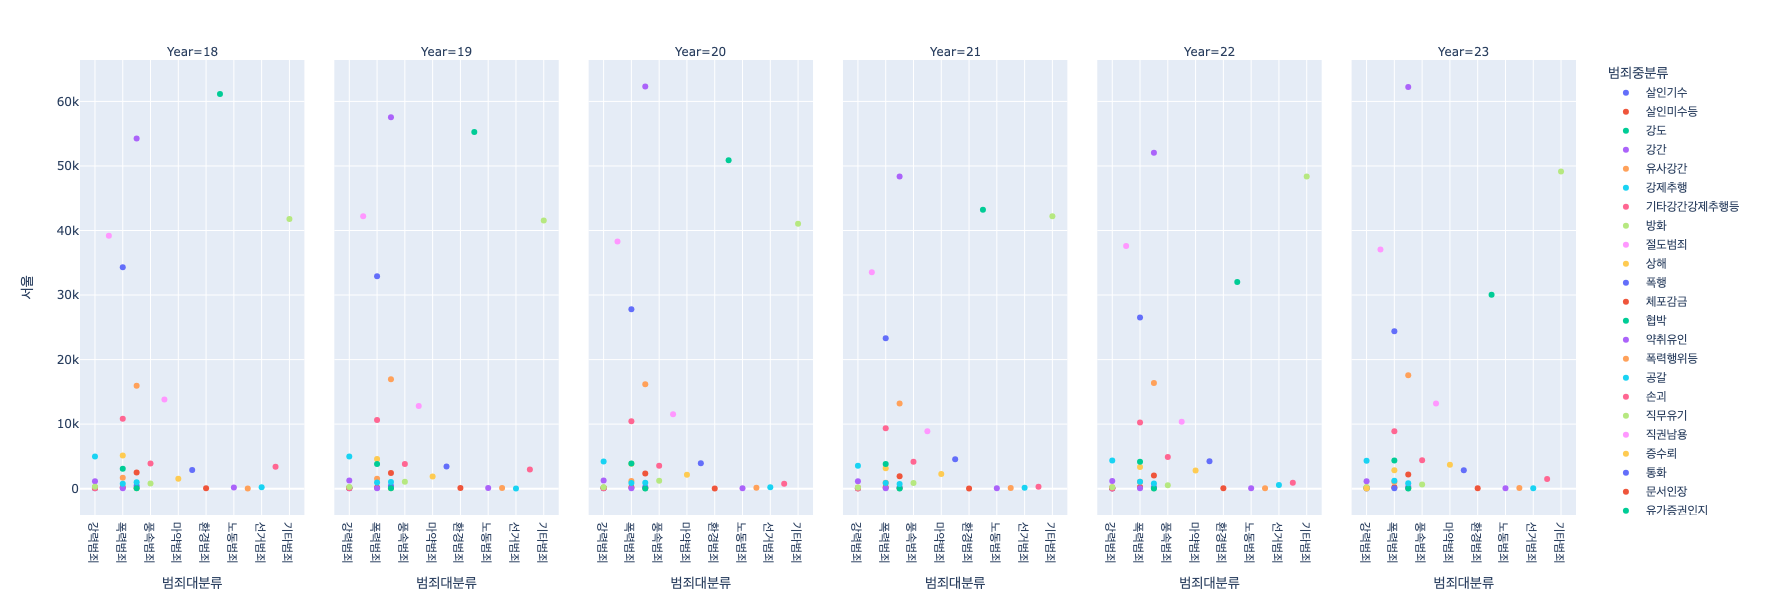

In [297]:
fig = px.scatter(
    df1,
    x="범죄대분류",      # Variable on the x-axis
    y="서울",         # Variable for the boxplot values
    facet_col="Year",  # Facet by 'Year'
    # title="Boxplot with Faceting",
    color="범죄중분류",  # Optional: Color by category
    # boxmode="group"    # Group boxplots for each category
)

fig.update_layout(
    title_font_size=20,
    # xaxis_title="Category",
    # yaxis_title="Value",
    # legend_title="Category",
    height=600,
    width=1500,
)

fig.show()